In [101]:
import pandas as pd
import numpy as np
import scipy.stats

<H2>Тест 1.</H2>

In [2]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/222d901d6ba796c5e7ef850a645bea29/asset-v1:hse+STATDA+2021+type@asset+block/StarWars.csv', sep=';')
df

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится
1,3292879538,нет,NaN,М,18-29,0 - 24.999,Юго-Западный центральный,NaN,NaN
2,3292765271,да,нет,М,18-29,0 - 24.999,Северо-Западный центральный,не знаю такого персонажа,нравится
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится
...,...,...,...,...,...,...,...,...,...
1181,3288388730,да,да,Ж,18-29,0 - 24.999,Северо-Восточный центральный,очень нравится,нравится
1182,3288378779,да,да,Ж,30-44,50.000 - 99.999,Горный,очень нравится,очень нравится
1183,3288375286,нет,NaN,Ж,30-44,50.000 - 99.999,Средне-Атлантический,NaN,NaN
1184,3288373068,да,да,Ж,45-60,100.000 - 149.999,Северо-Восточный центральный,очень нравится,очень нравится


<H3>Вопрос 1-1.</H3> Укажите, верно ли следующее утверждение: мужчины 18-29 лет, которые не являются фанатами серии, чаще всего проживают в Тихоокеанском регионе.

In [3]:
df[(df['age_group'] == '18-29') & (df['fan'] == 'нет')].groupby('loc')['respondentID'].count().sort_values(ascending=False)

loc
Тихоокеанский                   19
Северо-Восточный центральный     6
Северо-Западный центральный      6
Новая Англия                     5
Средне-Атлантический             5
Горный                           4
Юго-Западный центральный         4
Южно-Атлантический               4
Юго-Восточный центральный        3
Name: respondentID, dtype: int64

<H3>Вопрос 1-2.</H3>Какой регион проживания реже всего встречается в данных?

In [4]:
df.groupby('loc')['respondentID'].count().sort_values()

loc
Юго-Восточный центральный        38
Новая Англия                     75
Горный                           79
Северо-Западный центральный      93
Юго-Западный центральный        110
Средне-Атлантический            122
Южно-Атлантический              170
Тихоокеанский                   175
Северо-Восточный центральный    181
Name: respondentID, dtype: int64

<H3>Вопрос 1-3.</H3>Сколько респондентов не ответили на вопрос, нравится ли им Йода?

In [5]:
df[df['yoda'].isna()].shape

(360, 9)

<H3>Вопрос 1-4.</H3>Скольким респондентам из Новой Англии очень нравится принцесса Лея Органа?

In [6]:
df[(df['loc'] == 'Новая Англия') & (df['princess_leia_organa'] == 'очень нравится')].shape

(39, 9)

<H3>Вопрос 1-5.</H3>Укажите, верно ли следующее утверждение: все женщины старше 60 лет, входящие в категорию с наивысшим доходом и являющиеся фанатами серии фильмов, проживают в одном регионе.

In [7]:
df['income'].unique()

array([nan, '0 - 24.999', '100.000 - 149.999', '25.000 - 49.999',
       '50.000 - 99.999', '150.000+'], dtype=object)

In [8]:
df[(df['gender'] == 'Ж') 
   & (df['age_group'] == '> 60') 
   & (df['income'] == '150.000+') 
  & (df['fan'] == 'да')]

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
162,3291141478,да,да,Ж,> 60,150.000+,Тихоокеанский,очень нравится,очень нравится
522,3290342102,да,да,Ж,> 60,150.000+,Северо-Западный центральный,очень нравится,очень нравится
671,3289963393,да,да,Ж,> 60,150.000+,Горный,очень нравится,очень нравится


<H3>Вопрос 1-6.</H3>Какой регион проживания чаще всего встречается в данных?

см. Вопрос 2

<H3>Вопрос 1-7.</H3>Сколько респондентов не назвали свой доход?

In [9]:
df['income'].isna().sum()

328

<H3>Вопрос 1-8.</H3>Скольким респондентам одновременно очень нравятся Йода и принцесса Лея Органа?

In [10]:
df['yoda'].unique()

array(['очень нравится', nan, 'не знаю такого персонажа', 'нравится',
       'очень не нравится', 'отношусь нейтрально', 'не нравится'],
      dtype=object)

In [11]:
df[(df['yoda'] == 'очень нравится') & (df['princess_leia_organa'] == 'очень нравится')]['respondentID'].count()

462

<H3>Вопрос 1-9.</H3>Сколько респондентов не видели ни одного фильма серии, но считают себя ее фанатами?

In [12]:
df[(df['seen'] == 'нет') & (df['fan'] == 'да')]

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa


<H3>Вопрос 1-10.</H3>Сколько респондентов не ответили ни на один вопрос?

In [13]:
df['any_response'] = df[['seen', 'fan', 'yoda', 'princess_leia_organa']].notna().sum(axis=1)
df[df['any_response'] == 0]

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa,any_response


<H3>Вопрос 1-11.</H3>Посмотрите на мужчин, проживающих в горном районе. В ответ запишите ID респондента, входящего в категорию с наивысшим доходом при заданных условиях

In [14]:
df[(df['gender'] == 'М') & (df['loc'] == 'Горный') & (df['income'] == '150.000+')]

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa,any_response
169,3291077381,да,нет,М,45-60,150.000+,Горный,нравится,отношусь нейтрально,4


<H3>Вопрос 1-12.</H3>Укажите, верно ли следующее утверждение: фанатов серии фильмов в возрастной категории 45-60 меньше, чем не-фанатов в возрастной категории 18-29

In [15]:
df[(df['age_group'] == '45-60') & (df['fan'] == 'да')]['respondentID'].count() < df[(df['age_group'] == '18-29') & (df['fan'] == 'нет')]['respondentID'].count()

False

<H3>Вопрос 1-13.</H3>Сколько процентов (от общего числа респондентов) являются фанатами серии фильмов, проживают в Новой Англии и имеют доход 0 - 24.999 долларов? В ответ запишите число (процент от 0 до 100), округлите до целого

In [16]:
total_resp = df.shape[0]
total_resp

res_group = df[(df['fan'] == 'да') & (df['loc'] == 'Новая Англия') & (df['income'] == '0 - 24.999')]['respondentID'].count()

In [17]:
100 * res_group / total_resp

0.7588532883642496

<H2>ТЕСТ 2</H2>

In [18]:
df2 = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/87c72c7b117de3aaaabc62e72683d98e/asset-v1:hse+STATDA+2021+type@asset+block/MarvelComicCaracters.csv', sep=';')
df2

,name,align,eye,hair,sex,appearances,first_appearance
0,Spider-Man (Peter Parker),Добрый персонаж,Карие глаза,Каштановые волосы,Мужской персонаж,4043.0,1962.0
1,Captain America (Steven Rogers),Добрый персонаж,Голубые глаза,Белые волосы,Мужской персонаж,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Нейтральный персонаж,Голубые глаза,Черные волосы,Мужской персонаж,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Добрый персонаж,Голубые глаза,Черные волосы,Мужской персонаж,2961.0,1963.0
4,Thor (Thor Odinson),Добрый персонаж,Голубые глаза,Русые волосы,Мужской персонаж,2258.0,1950.0
...,...,...,...,...,...,...,...
16371,Ru'ach (Earth-616),Злой персонаж,Зеленые глаза,Без волос,Мужской персонаж,NaN,NaN
16372,Thane (Thanos' son) (Earth-616),Добрый персонаж,Голубые глаза,NaN,Мужской персонаж,NaN,NaN
16373,Tinkerer (Skrull) (Earth-616),Злой персонаж,Черные глаза,NaN,Мужской персонаж,NaN,NaN
16374,TK421 (Spiderling) (Earth-616),Нейтральный персонаж,NaN,NaN,Мужской персонаж,NaN,NaN


Описание данных
– name — оригинальное имя персонажа вселенной Marvel
– align — принадлежность персонажа к доброй/злой/нейтральной стороне
– eye — описание глаз персонажа
– hair — описание волос персонажа
– sex — пол персонажа
– appearances — количество появлений персонажа
– first_appearance — год первого появления персонажа

<H3>Вопрос 2-1.</H3>Какой тип графика из перечисленных наиболее удобен для описания распределения переменной appearances? (линейный, столбчатая диаграмма, гистограмма, график построить нельзя)

<Axes: >

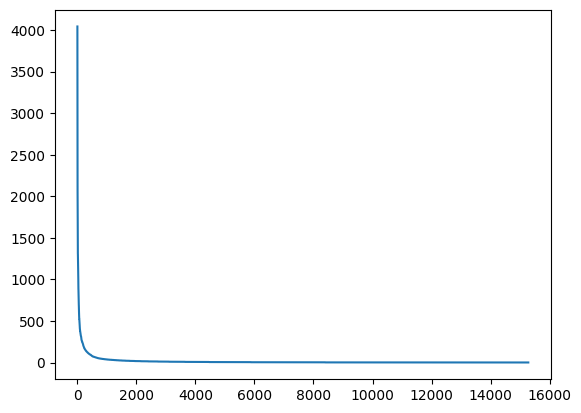

In [19]:
df2['appearances'].plot(kind='line')

In [20]:
#df2['appearances'].plot(kind='bar')

<Axes: >

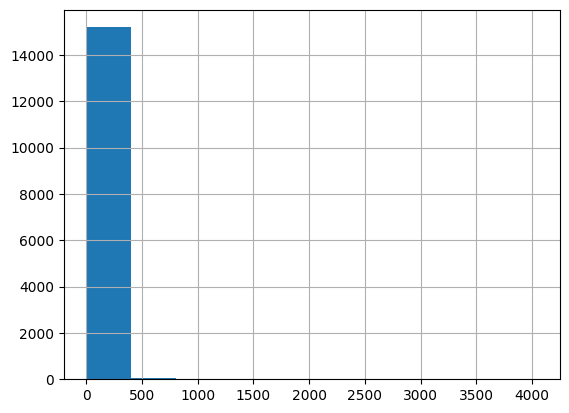

In [21]:
df2['appearances'].hist()

In [22]:
df2['name'].nunique()

16376

<H3>Вопрос 2-2.</H3>По переменной align была построена частотная таблица. Укажите, какие ошибки были допущены в таблице. Чтобы проверить ее, постройте таблицу сами, используя удобную вам программу.

In [24]:
df2.groupby('align').size()

align
Добрый персонаж         4636
Злой персонаж           6720
Нейтральный персонаж    2208
dtype: int64

<H3>Вопрос 2-3.</H3>Определите три наиболее часто встречающих цвета глаз персонажей, выберите из данных только их и заполните частотную таблицу по переменной eye. В вариантах ответов представлены числа, которые могут быть записаны в таблицу. 

In [28]:
df2['eye'].value_counts()

Голубые глаза            1962
Темно-карие глаза        1924
Зеленые глаза             613
Черные глаза              555
Красные глаза             508
Белые глаза               400
Желтые глаза              256
Серые глаза                95
Карие глаза                76
Разноцветные глаза         49
Фиолетовые глаза           31
Оранжевые глаза            25
Розовые глаза              21
Один глаз                  21
Золотые глаза              14
Серебристые глаза          12
Лиловые глаза              11
Янтарные глаза             10
Много глаз                  7
Нет глаз                    7
Желтые глазные яблоки       6
Черные глазные яблоки       3
Пурпурные глаза             2
Фасеточные глаза            1
Name: eye, dtype: int64

<H3>Вопрос 2-4.</H3>Укажите, верно ли следующее утверждение: у мужских персонажей чаще всего встречаются темно-карие глаза

In [31]:
df2[df2['sex'] == 'Мужской персонаж']['eye'].value_counts()

Темно-карие глаза        1400
Голубые глаза            1258
Черные глаза              394
Красные глаза             377
Зеленые глаза             328
Белые глаза               292
Желтые глаза              174
Серые глаза                75
Карие глаза                58
Разноцветные глаза         28
Один глаз                  20
Оранжевые глаза            18
Розовые глаза              15
Фиолетовые глаза           15
Золотые глаза              10
Янтарные глаза              8
Много глаз                  6
Серебристые глаза           4
Желтые глазные яблоки       4
Нет глаз                    3
Лиловые глаза               3
Черные глазные яблоки       1
Фасеточные глаза            1
Name: eye, dtype: int64

<H3>Вопрос 2-5.</H3>Постройте частотную таблицу для персонажей женского пола по переменной eye. У скольких из них золотые глаза?

In [32]:
df2[df2['sex'] == 'Женский персонаж']['eye'].value_counts()

Голубые глаза            692
Темно-карие глаза        519
Зеленые глаза            268
Черные глаза             137
Белые глаза               82
Красные глаза             77
Желтые глаза              57
Серые глаза               20
Карие глаза               17
Фиолетовые глаза          14
Лиловые глаза              8
Разноцветные глаза         7
Серебристые глаза          6
Розовые глаза              5
Оранжевые глаза            5
Золотые глаза              3
Янтарные глаза             2
Желтые глазные яблоки      2
Черные глазные яблоки      2
Пурпурные глаза            2
Нет глаз                   1
Много глаз                 1
Один глаз                  1
Name: eye, dtype: int64

<H3>Вопрос 2-6.</H3>Какое значение находится в колонке appearances для доброго персонажа с пурпурными глазами?

In [33]:
df2[(df2['align'] == 'Добрый персонаж') & (df2['eye'] == 'Пурпурные глаза')]['appearances']

1729    21.0
Name: appearances, dtype: float64

<H3>Вопрос 2-7.</H3>Укажите, верно ли следующее утверждение: больше всего персонажей в первый раз появилось в 1993 году

In [35]:
df2['first_appearance'].value_counts()

1993.0    554
1994.0    485
1992.0    455
2006.0    381
2008.0    360
         ... 
1952.0     26
1956.0     16
1957.0      7
1959.0      4
1958.0      2
Name: first_appearance, Length: 75, dtype: int64

<H3>Вопрос 2-8.</H3>Сколько процентов (от общего числа персонажей) составляют мужские персонажи, которые появлялись больше 100 раз? В ответ запишите число (процент от 0 до 100), округлите до целого.

In [42]:
100* df2[(df2['sex'] == 'Мужской персонаж') & (df2['appearances'] > 100)].shape[0] / df2.shape[0]

1.6914997557401075

<H2>Тест 3.</H2>

<H3>Вопрос 3-1.</H3>Какова мода по переменной eye?

In [43]:
df2['eye'].mode()

0    Голубые глаза
Name: eye, dtype: object

<H3>Вопрос 3-2.</H3>Укажите, верно ли следующее утверждение: мода по переменной hair для женских персонажей равна моде по переменной hair для мужских персонажей.

In [44]:
df2[df2['sex'] == 'Мужской персонаж']['hair'].mode() == df2[df2['sex'] == 'Женский персонаж']['hair'].mode()

0    True
Name: hair, dtype: bool

<H3>Вопрос 3-3.</H3>Выберите только злых персонажей и определите медиану по переменной appearances

In [45]:
df2[df2['align'] == 'Злой персонаж']['appearances'].median()

3.0

<H3>Вопрос 3-4.</H3>Найдите дисперсию по переменной appearances. Помните, что мы работаем с генеральной совокупностью.

In [48]:
df2['appearances'].var(ddof=0)

9287.139461894549

In [49]:
df2['appearances'].var()

9287.74729875965

<H3>Вопрос 3-5.</H3>Найдите моду по переменной first_appearance.

In [50]:
df2['first_appearance'].mode()

0    1993.0
Name: first_appearance, dtype: float64

<H3>Вопрос 3-6.</H3>Укажите, верно ли следующее утверждение: если убрать первые пятьсот наблюдений в наших данных, то мода по переменной eye не изменится

In [55]:
df2['eye'].mode()

0    Голубые глаза
Name: eye, dtype: object

In [57]:
df2.iloc[499:]['eye'].mode()

0    Темно-карие глаза
Name: eye, dtype: object

<H3>Вопрос 3-7.</H3>Определите моду по переменной hair, затем выберите только тех персонажей, цвет волос которых соответствует найденной моде. По имеющемуся подмассиву данных по переменной appearances рассчитайте стандартное отклонение. Помните, что мы работаем с генеральной совокупностью.

In [51]:
df2['hair'].mode()

0    Черные волосы
Name: hair, dtype: object

In [54]:
df2[df2['hair'] == df2['hair'].mode()[0]]['appearances'].std(ddof=0)

94.13253937689814

<H2>Тест 4.</H2>

<H3>Вопрос 4-1.</H3>Сколько пропущенных значений в переменной appearances?

In [59]:
df2['appearances'].isna().sum()

1096

<H3>Вопрос 4-2.</H3>Укажите, верно ли следующее утверждение: наибольший межквартильный размах по переменной appearances будет для злых персонажей. Вам понадобятся данные по типу персонажа (переменная align), удалите пропущенные значения по столбцу appearances и посчитайте требуемую меру разброса

In [74]:
desc = df2[df2['appearances'].notna()].groupby('align')['appearances'].describe()

In [75]:
desc['iqr'] = desc['75%'] - desc['25%']
desc

,count,mean,std,min,25%,50%,75%,max,iqr
align,,,,,,,,,
Добрый персонаж,4310.0,34.942691,159.591704,1.0,2.0,5.0,15.0,4043.0,13.0
Злой персонаж,6352.0,8.329660,25.725767,1.0,1.0,3.0,6.0,721.0,5.0
Нейтральный персонаж,2093.0,19.632585,109.509755,1.0,1.0,3.0,9.0,3061.0,8.0


<H3>Вопрос 4-3.</H3>Сколько выбросов встречается по переменной appearances? Работайте с исходными данными, предварительно удалите пропущенные значения по столбцу appearances, используйте для нахождения выбросов межквартильный размах.

In [117]:
df2_filt.shape

(15280, 7)

In [109]:
df2_filt = df2[df2['appearances'].notna()]
q1 = df2_filt['appearances'].quantile(0.25)
q3 = df2_filt['appearances'].quantile(0.75)
IQR = q3 - q1

In [110]:
outlier_bottom_threshold = q1 - 1.5 * IQR
outlier_top_threshold = q3 + 1.5 * IQR
outliers = df2_filt[(df2_filt['appearances'] < outlier_bottom_threshold) |
         (df2_filt['appearances'] > outlier_top_threshold)]
outliers['appearances'].count()

1938

In [119]:
df2_filt_without_IQR_outliers = df2_filt.drop(outliers.index, axis=0)
df2_filt_without_IQR_outliers.head(20)

,name,align,eye,hair,sex,appearances,first_appearance
1938,Zar (Earth-616),Добрый персонаж,Черные глаза,Каштановые волосы,Мужской персонаж,18.0,1939.0
1939,Dynamic Man (Earth-616),Злой персонаж,Голубые глаза,Русые волосы,Мужской персонаж,18.0,1940.0
1940,John Steele (American Soldier) (Earth-616),Добрый персонаж,Темно-карие глаза,Черные волосы,Мужской персонаж,18.0,1940.0
1941,Della Mason (Earth-616),Злой персонаж,NaN,Черные волосы,Женский персонаж,18.0,1948.0
1942,Lance Temple (Texas Kid) (Earth-616),Добрый персонаж,Голубые глаза,Оранжевые волосы,Мужской персонаж,18.0,1951.0
1943,Fenris Wolf (Earth-616),Злой персонаж,Красные глаза,Черные волосы,Мужской персонаж,18.0,1965.0
1944,Norton McCoy (Earth-616),Добрый персонаж,Голубые глаза,Каштановые волосы,Мужской персонаж,18.0,1965.0
1945,Bast (Goddess) (Earth-616),Нейтральный персонаж,Зеленые глаза,Черные волосы,Женский персонаж,18.0,1966.0
1946,Theodore Roberts (Earth-616),Нейтральный персонаж,Голубые глаза,Каштановые волосы,Мужской персонаж,18.0,1966.0
1947,Franz Cadavus (Earth-616),Злой персонаж,NaN,Русые волосы,Мужской персонаж,18.0,1968.0


<H3>Вопрос 4-4.</H3>На основе данных, полученных в третьем номере, укажите, верно ли следующее утверждение: наибольшее количество выбросов по переменной appearances наблюдается у добрых персонажей.

In [90]:
outliers.groupby('align')['appearances'].count()

align
Добрый персонаж         944
Злой персонаж           551
Нейтральный персонаж    285
Name: appearances, dtype: int64

<H3>Вопрос 4-5.</H3>Создайте новую переменную, которая будет представлять собой прологарифмированную переменную appearances. Сколько выбросов получится по новой переменной? Работайте с исходными данными, предварительно удалите пропущенные значения по новому столбцу, используйте для нахождения выбросов три среднеквадратичных отклонения от среднего.

In [95]:
df2_filt['log_appearances'] = df2_filt['appearances'].apply(lambda x: np.log(x))
mean = df2_filt['log_appearances'].mean()
std = df2_filt['log_appearances'].std()
log_outlier_bottom_threshold = mean - 3 * std
log_outlier_top_threshold = mean + 3 * std
log_outliers = df2_filt[(df2_filt['log_appearances'] < log_outlier_bottom_threshold) |
         (df2_filt['log_appearances'] > log_outlier_top_threshold)]
log_outliers['log_appearances'].count()

C:\Users\KDK\AppData\Local\Temp\ipykernel_9552\1569312606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filt['log_appearances'] = df2_filt['appearances'].apply(lambda x: np.log(x))


195

<H3>Вопрос 4-6.</H3>Сколько выбросов получится по переменной appearances? Работайте с исходными данными, предварительно удалите пропущенные значения по столбцу appearances, используйте для нахождения выбросов три среднеквадратичных отклонения от среднего. 

In [96]:
mean = df2_filt['appearances'].mean()
std = df2_filt['appearances'].std()
maverick_bottom_threshold = mean - 3 * std
maverick_top_threshold = mean + 3 * std
mavericks = df2_filt[(df2_filt['appearances'] < maverick_bottom_threshold) |
         (df2_filt['appearances'] > maverick_top_threshold)]
mavericks['appearances'].count()

128

<H3>Вопрос 4-7.</H3>Сколько выбросов получится по переменной appearancs, если выбраны только женские персонажи? Работайте с исходными данными, выберите женских персонажей, удалите пропущенные значения по столбцу appearancs, используйте для нахождения выбросов z-оценку и три среднеквадратичных отклонения

In [106]:
df2_filt2 = df2[(df2['sex'] == 'Женский персонаж') & (df2['appearances'].notna())]
df2_filt2['appearances_zscore'] = scipy.stats.zscore(df2_filt2['appearances'])
outliers = df2_filt2[(df2_filt2['appearances_zscore'] > 3) | (df2_filt2['appearances_zscore'] < -3)]
outliers['appearances_zscore'].count()

C:\Users\KDK\AppData\Local\Temp\ipykernel_9552\2101207485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filt2['appearances_zscore'] = scipy.stats.zscore(df2_filt2['appearances'])


48

In [107]:
mean = df2_filt2['appearances'].mean()
std = df2_filt2['appearances'].std()
outliers = df2_filt2[(df2_filt2['appearances'] < (mean - 3 * std)) | (df2_filt2['appearances'] > (mean + 3 * std))]
outliers['appearances'].count()

48

<H3>Вопрос 4-8.</H3>Сравните среднее значение по переменной appearancs в двух датафреймах — без выбросов, определенных по межквартильному размаху, и без выбросов, определенных по трем среднеквадратичным отклонениям от среднего. Будем считать, что границы датафреймов без выбросов содержат значения верхних и нижних границ, определенных по межквартильному размаху или среднеквадратичному отклонению от среднего. В ответ запишите число (наибольшее среднее из двух), округлите до целого.

In [120]:
df2_filt_without_IQR_outliers['appearances'].mean()

3.9579523309848597

In [123]:
df2_filt_without_3std_outliers = df2_filt.drop(mavericks.index, axis=0)
df2_filt_without_3std_outliers['appearances'].mean()

10.509701689545935

<H3>Вопрос 4-9.</H3>Укажите, верно ли следующее утверждение: в датафрейме для добрых женских персонажей мода по переменной hair не изменится, если удалить выбросы по переменной appearances. Работайте с исходными данными, предварительно удалите пропущенные значения по столбцу appearances, используйте для нахождения выбросов межквартильный размах.

In [125]:
selected = df2[(df2['sex'] == 'Женский персонаж') & (df2['appearances'].notna()) & (df2['align'] == 'Добрый персонаж')]
selected['hair'].mode()

0    Черные волосы
Name: hair, dtype: object

In [127]:
without_outliers = selected.drop(outliers.index, axis=0, errors='ignore')
without_outliers['hair'].mode()

0    Черные волосы
Name: hair, dtype: object

<H3>Вопрос 4-10.</H3>Выберите только злых персонажей. Сравните медиану по переменной appearances в двух датафреймах — с выбросами и без выбросов, определенных по межквартильному размаху. В ответ запишите число (наибольшее среднее из двух), округлите до целого.

In [128]:
df2_filt[df2_filt['align'] == 'Злой персонаж']['appearances'].median()

3.0

In [129]:
df2_filt_without_IQR_outliers['appearances'].median()

2.0

<H3>Вопрос.</H3>

In [136]:
df3 = pd.DataFrame({'X': [13, 21, 30, 65, 50], 'Y': [200, 90, 10, 83, 12]})
df3.corr()

,X,Y
X,1.000000,-0.506545
Y,-0.506545,1.000000
